# Спектр гармонического сигнала

## Цель работы

Необходимо получить графики гармонического сигнала с частотами 1,2,4,8 герц и спектры этих сигналов.

## Код программы

In [163]:
%matplotlib notebook
from cycler import cycler
from numpy import sin, cos, linspace
from scipy.fft import rfft, rfftfreq, irfft, fft
# from scipy import signal
from math import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [164]:
TIME_RANGE = 64   # Time range (sec)
FS         = 2000 # Sampling freq (Hz)

# plt.xlim([min, max])

def t_step(w):
    """
    Generates a time steps array
    """
    N         = FS * TIME_RANGE
    TIME_STEP = 1 / FS # Sample time interval
    return linspace(0, TIME_RANGE, N)

def f_step(w):
    """
    Generates a frequency steps array
    """
    N         = FS * TIME_RANGE
    FREQ_STEP = FS / N # Sample freq interval
    return linspace(0, TIME_RANGE, N)

def signal(_func_):
    def wrapper(A, k, t, w, q):
        t      = t_step(w)
        f      = [_func_(A, k, ti, w, q) for ti in t]
        return (t, f) 
    return wrapper

def spectrum(a, t, f, w):
    N = FS * TIME_RANGE
    
    '''
    freq = f_step(w)
    ampl = fft(f)
    
    # Normalization
    ampl = abs(ampl) / TIME_RANGE / 1000
    '''
    
    '''
    freq = rfftfreq(N, 1 / FS)
    ampl = rfft(f)
    '''
    freq = rfftfreq(N, 1 / FS)
    ampl = rfft(f)
    
    return freq, ampl

def restore_decay(x, A, k, a=0):
    y = [dump(xi, A, k) + a for xi in x]
    return (y, [-yi for yi in y])

def display(fig, x, y, color='gray'):
    weight = 1
    if color == 'gray':
        style = 'dashed'
    else:
        style = 'solid'
        
    fig.plot(x, y, color, lw=weight, ls=style)
    fig.grid()

def dump(t, A, k=0):
    return A * exp(-k * t)

<IPython.core.display.Javascript object>


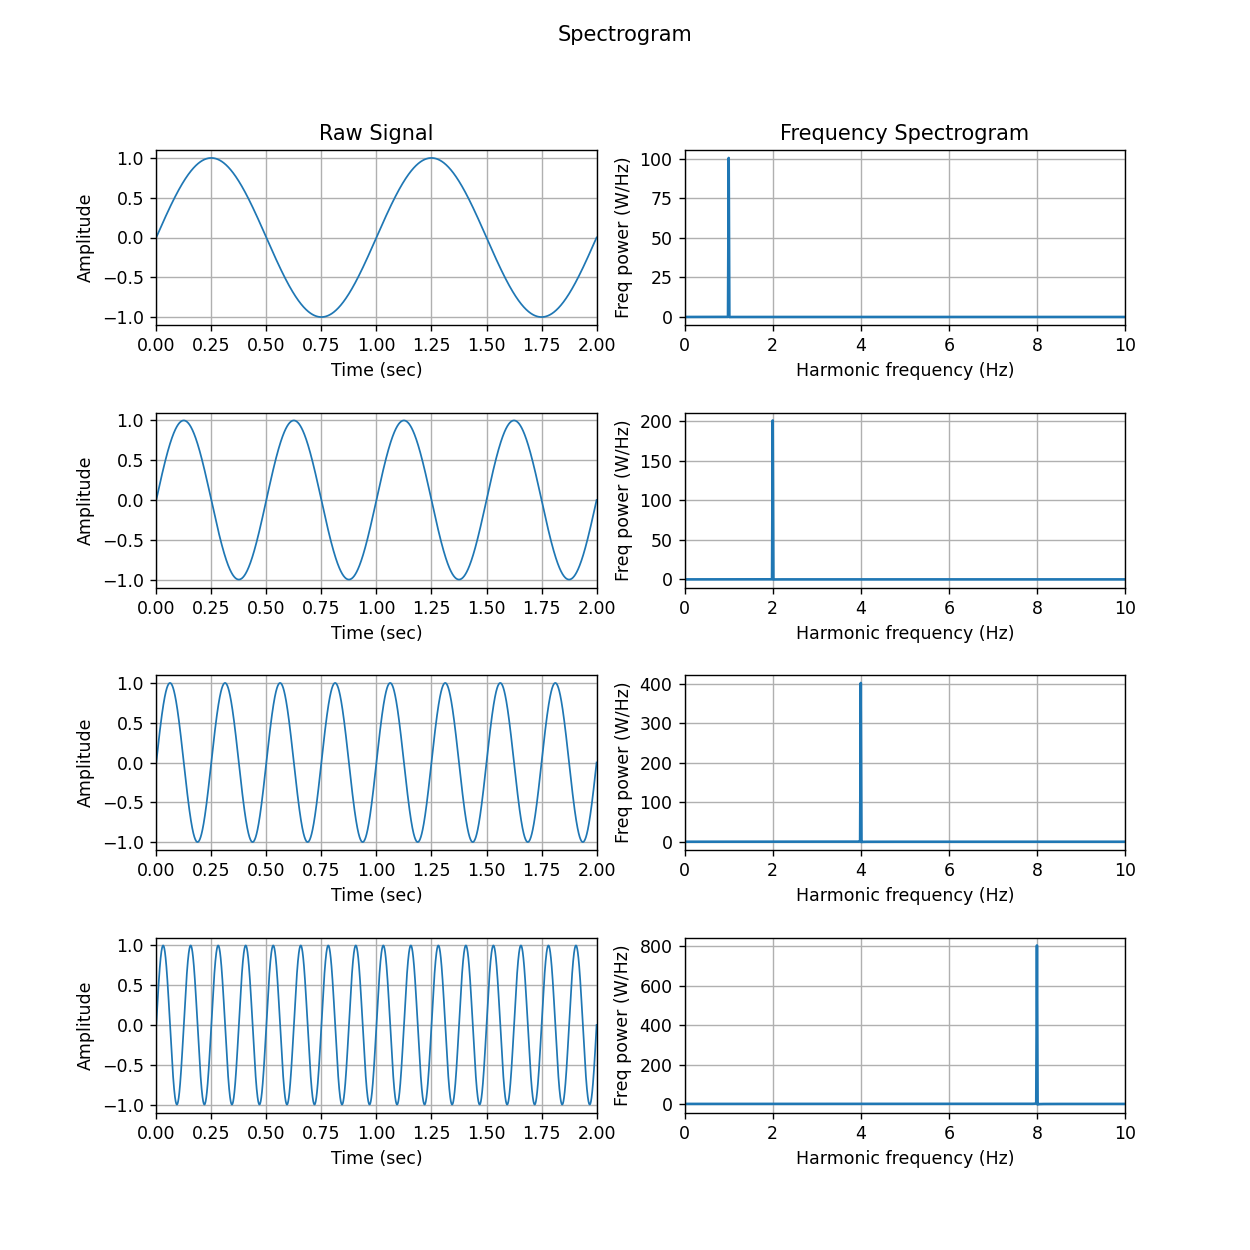

c:\users\emb\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\emb\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\emb\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\emb\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [166]:
A = 1.0
k = 0.0

@signal
def func(A, k, t, w, q):
    w *= 2*pi
    return dump(t, A, k) * sin(w * t + q)
    # dump(t, A, k) * (sin(1*w*t) / 1 + sin(3*w*t) / 3 + sin(5*w*t) / 5 + sin(7*w*t) / 7 + sin(9*w*t) / 9)
    
xf1, yf1 = func(A, 0.0, None, 1, 0)
xf2, yf2 = func(A, 0.0, None, 2, 0)
xf4, yf4 = func(A, 0.0, None, 4, 0)
xf8, yf8 = func(A, 0.0, None, 8, 0)

xs1, ys1 = spectrum(A, xf1, yf1, 1)
xs2, ys2 = spectrum(A, xf2, yf2, 2)
xs4, ys4 = spectrum(A, xf4, yf4, 4)
xs8, ys8 = spectrum(A, xf8, yf8, 8)


fig, ((afunc1, aspec1), (afunc2, aspec2), (afunc4, aspec4), (afunc8, aspec8)) = plt.subplots(figsize=(10, 10), dpi=100, nrows=4, ncols=2)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Spectrogram')
signals   = fig.axes[::2]
spectrums = fig.axes[1::2]

def ylabel(axes, label):
    for axis in axes:
        axis.set_ylabel(label)

def xlabel(axes, label):
    for axis in axes:
        axis.set_xlabel(label)
        
def grid(axes):
    for axis in axes:
        axis.grid()
        
def xlim(axes, lim):
    for axis in axes:
        axis.set_xlim(lim)

def ylim(axes, lim):
    for axis in axes:
        axis.set_ylim(lim)

# Setting visible intervals
xlim(signals, [0, 2])
xlim(spectrums, [0, 10])

# Drawing grid
grid(signals)
grid(spectrums)

# Setting y labels
ylabel(signals, 'Amplitude')
ylabel(spectrums, 'Freq power (W/Hz)')

# Setting x labels
xlabel(signals, 'Time (sec)')
xlabel(spectrums, 'Harmonic frequency (Hz)')

# Setting column titles
afunc1.set_title('Raw Signal')
aspec1.set_title('Frequency Spectrogram')

style = '-'

# Plotting
afunc1.plot(xf1, yf1, style, lw=1)
afunc2.plot(xf2, yf2, style, lw=1)
afunc4.plot(xf4, yf4, style, lw=1)
afunc8.plot(xf8, yf8, style, lw=1)

aspec1.plot(xs1, ys1, style)
aspec2.plot(xs2, ys2, style)
aspec4.plot(xs4, ys4, style)
aspec8.plot(xs8, ys8, style)

In [114]:
arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
type(fig.axes[::2])


list